# Übung 2: Hauptkomponentenanalyse

In [1]:
import pandas as pd
import numpy as np
import util
import scipy.stats as scs
%matplotlib inline

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols =["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","TGT"]
boston = pd.read_csv(url, sep=" ", skipinitialspace=True, header=None, names=cols, index_col=False) # Dataframe
dateDownloaded = !date
dateDownloaded

['Sun Jan  3 21:18:05 CET 2016']

In [3]:
np.shape(boston)

(506, 14)

1. Zentrierung der Daten mit Mittelwert $ \mu_{x} = \frac{1}{n} \sum_{i=0}^n x_{i} $

In [4]:
aligned_data = util.align(boston)

In [5]:
aligned_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,-3.607204,6.636364,-8.826779,-0.06917,-0.016695,0.290366,-3.374901,0.294957,-8.549407,-112.237154,-3.155534,40.225968,-7.673063,1.467194
1,-3.586214,-11.363636,-4.066779,-0.06917,-0.085695,0.136366,10.325099,1.172057,-7.549407,-166.237154,-0.655534,40.225968,-3.513063,-0.932806
2,-3.586234,-11.363636,-4.066779,-0.06917,-0.085695,0.900366,-7.474901,1.172057,-7.549407,-166.237154,-0.655534,36.155968,-8.623063,12.167194
3,-3.581154,-11.363636,-8.956779,-0.06917,-0.096695,0.713366,-22.774901,2.267157,-6.549407,-186.237154,0.244466,37.955968,-9.713063,10.867194
4,-3.544474,-11.363636,-8.956779,-0.06917,-0.096695,0.862366,-14.374901,2.267157,-6.549407,-186.237154,0.244466,40.225968,-7.323063,13.667194


## PCA

In [6]:
Qi, Ai, Sigma = util.pca(boston) # auf zentrierte daten

Eigenwerte der Kovarianzmatrix Quadrieren -> somit Varianzen der Hauptkomponenten

In [7]:
Var = Sigma**2

In [8]:
Var_prop = 1/sum(Var) * Var * 100

In [9]:
Var_cum = Var_prop.cumsum()

In [10]:
Var_error = 100 - Var_cum

In [11]:
Var_dict = {"Varianz" :  Var, "erklärte Varianz" : Var_prop, "kumulierte erklärte Varianz" : Var_cum, "Fehler" : Var_error}
pd.DataFrame(data=Var_dict, index=["a{}".format(s) for s in range(0,14)])

,Fehler,Varianz,erklärte Varianz,kumulierte erklärte Varianz
a0,1.954278e+01,15609556.530113,80.457219,80.457219
a1,3.272224e+00,3156661.211443,16.270557,96.727776
a2,1.131391e+00,415344.323381,2.140833,98.868609
a3,4.356316e-01,134984.733640,0.695759,99.564368
a4,2.350922e-01,38906.777411,0.200539,99.764908
a5,1.135775e-01,23575.138209,0.121515,99.886422
a6,6.916366e-02,8616.765923,0.044414,99.930836
a7,3.387171e-02,6847.014539,0.035292,99.966128
a8,1.068043e-02,4499.355714,0.023191,99.989320
a9,3.597249e-03,1374.211591,0.007083,99.996403


Für einen 25 Prozentigen Fehler kann die erste Hauptkomponente verwendet werden. Für 10% und 5% Fehler können die ersten beiden Hauptkomponenten genommen werden.

__Korrelationskoeffizienten der Hauptkomponenten mit den ursprünglichen Daten__

In [12]:
util.pca_correlation(boston, Ai, 3).T

,a0,a1,a2
CRIM,0.598763,-0.061312,-0.040073
ZN,-0.328761,-0.003793,0.777348
INDUS,0.725985,0.056982,-0.369504
CHAS,-0.038672,0.032111,-0.105570
NOX,0.682237,-0.001268,-0.445792
RM,-0.292947,-0.040611,0.205130
AGE,0.522358,0.015987,-0.766612
DIS,-0.547655,-0.013345,0.608827
RAD,0.908346,0.078427,0.010846
TAX,0.990394,0.137295,0.016203


In [31]:
# median des Hauspreises
median_tgt = np.median(boston['TGT'])

# Maskierung mit Daten die unter dem median liegen in der Spalte TGT
smaller_tgt = boston['TGT'] < median_tgt

# ersten beiden Hauptkomponenten nicht zentriert
plot = pd.DataFrame(np.dot(boston, Qi))[[0,1]] # projezierte date

plot_smaller = plot[smaller_tgt]
plot_greater = plot[~smaller_tgt]

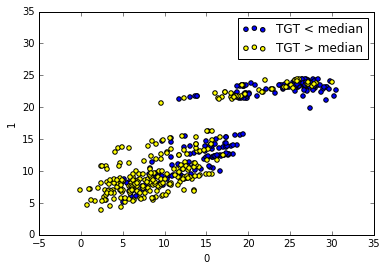

In [36]:
# ploten zweier datensätze. 
#siehe: http://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure
ax = plot_smaller.plot(x=0, y=1, kind='scatter', color='blue', label='TGT < median')
plot_greater.plot(x=0, y=1, kind='scatter', color='yellow', label='TGT > median', ax=ax)

An den ersten beiden Hauptkomponenten kann die höhe des Hauspreises nicht vorhergesagt werden.